# Apriori algorithm

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
x = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/eg1.csv'
df = pd.read_csv(x, 
                     header = None
                    )
df

,0,1,2,3,4
0,Apple,Orange,NaN,NaN,NaN
1,Apple,Banana,NaN,NaN,NaN
2,Apple,Coke,Orange,NaN,NaN
3,Orange,Coke,NaN,NaN,NaN
4,Orange,Coffee,NaN,NaN,NaN
5,Apple,Coffee,Orange,Coke,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dropna(how='all', 
         inplace=True
         )  #drop only if ALL columns are (an entire Row is) NaN
df

,0,1,2,3,4
0,Apple,Orange,NaN,NaN,NaN
1,Apple,Banana,NaN,NaN,NaN
2,Apple,Coke,Orange,NaN,NaN
3,Orange,Coke,NaN,NaN,NaN
4,Orange,Coffee,NaN,NaN,NaN
5,Apple,Coffee,Orange,Coke,NaN


In [4]:
df.dropna(axis=1,
          how='all', 
          inplace=True
         ) #drop only if entire column is NaN
df

,0,1,2,3
0,Apple,Orange,NaN,NaN
1,Apple,Banana,NaN,NaN
2,Apple,Coke,Orange,NaN
3,Orange,Coke,NaN,NaN
4,Orange,Coffee,NaN,NaN
5,Apple,Coffee,Orange,Coke


In [5]:
df.dropna(thresh = 2, # if there is at least 2 data, the row will be maintained. 
          inplace=True
         )
df

,0,1,2,3
0,Apple,Orange,NaN,NaN
1,Apple,Banana,NaN,NaN
2,Apple,Coke,Orange,NaN
3,Orange,Coke,NaN,NaN
4,Orange,Coffee,NaN,NaN
5,Apple,Coffee,Orange,Coke


## Data preprocessing

To have some basic info about the market basket: 

In [6]:
products = {*()} #initializing an empty SET
print('Type of products \t\t \t:',type(products))

for i in range (0, df.shape[0]):
    for j in range(0, df.shape[1]): 
        products.add(df.values[i,j])

print('The products available to purchase are  :', *products,
      '\nWe have a total of \t\t\t:',len(products),' products')

Type of products 		 	: <class 'set'>
The products available to purchase are  : nan Banana Coffee Apple Coke Orange 
We have a total of 			: 6  products


Mixed data types cant work with `TransactionEncoder()`

Prior to apply Transaction encorder, we need to check all members in the set is string. For: 

In [7]:
print(df.values[0,0], '\t',type((df.values[0,0])) )
print(df.iloc[0,0], '\t', type((df.iloc[0,0])))
print(df.values[1,3], '\t', type((df.values[1,3])))

Apple 	 <class 'str'>
Apple 	 <class 'str'>
nan 	 <class 'float'>


Since this df has mixed data types, we convet to 'str' all.

In [8]:
df_str = df.applymap(str)

In [9]:
for i in range(0, df_str.shape[0]):
  for j in range(0, df_str.shape[1]):
    print(df_str.values[i,j], '\t', type(df_str.values[i,j]))

Apple 	 <class 'str'>
Orange 	 <class 'str'>
nan 	 <class 'str'>
nan 	 <class 'str'>
Apple 	 <class 'str'>
Banana 	 <class 'str'>
nan 	 <class 'str'>
nan 	 <class 'str'>
Apple 	 <class 'str'>
Coke 	 <class 'str'>
Orange 	 <class 'str'>
nan 	 <class 'str'>
Orange 	 <class 'str'>
Coke 	 <class 'str'>
nan 	 <class 'str'>
nan 	 <class 'str'>
Orange 	 <class 'str'>
Coffee 	 <class 'str'>
nan 	 <class 'str'>
nan 	 <class 'str'>
Apple 	 <class 'str'>
Coffee 	 <class 'str'>
Orange 	 <class 'str'>
Coke 	 <class 'str'>


Now, all elements are `string`s. 

But `df_str` is a data frame. For `TransactionEncoder()`, we need a list of lists. 

For; 

In [10]:
df_str_lol = df_str.values.tolist()
df_str_lol

[['Apple', 'Orange', 'nan', 'nan'],
 ['Apple', 'Banana', 'nan', 'nan'],
 ['Apple', 'Coke', 'Orange', 'nan'],
 ['Orange', 'Coke', 'nan', 'nan'],
 ['Orange', 'Coffee', 'nan', 'nan'],
 ['Apple', 'Coffee', 'Orange', 'Coke']]

In [11]:
TE    = TransactionEncoder()
TE_lol = TE.fit(df_str_lol).transform(df_str_lol)
TE_lol

array([[ True, False, False, False,  True,  True],
       [ True,  True, False, False, False,  True],
       [ True, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [ True, False,  True,  True,  True, False]])

In [12]:
teDf = pd.DataFrame(TE_lol,
                    columns = TE.columns_
                   )
teDf

,Apple,Banana,Coffee,Coke,Orange,nan
0,True,False,False,False,True,True
1,True,True,False,False,False,True
2,True,False,False,True,True,True
3,False,False,False,True,True,True
4,False,False,True,False,True,True
5,True,False,True,True,True,False


Using `Transactionencoder()` we can transform this dataset into a logical data frame. 

* Each column represents a product (we have 7 products, so 7 columns)
* Each row represent a record or a transaction for one purchase (we have 8 transactions / purchases).

TRUE if the transaction occurs FALSE if not.

In [13]:
teDf = teDf.drop(['nan'], ##drop nan column #None sometimes
                 axis = 1
                )
teDf

,Apple,Banana,Coffee,Coke,Orange
0,True,False,False,False,True
1,True,True,False,False,False
2,True,False,False,True,True
3,False,False,False,True,True
4,False,False,True,False,True
5,True,False,True,True,True


Alternatevely:

```
df
x = pd.get_dummies(df)# NOOOO
x
```

```
for i in range(0, df.shape[0]):
   for j in range(0, df.shape[1]):
       print('i : {} \t j: {} \t entry : {} \t type : {}'. format(i, j, df.values[i,j], type(df.values[i,j])))
```

### What are the most purchased items?

In [14]:
cart = []
for i in range(0, df.shape[0]):
    for j in range(0, df.shape[1]):
        cart.append(df.values[i,j])
cart

['Apple',
 'Orange',
 nan,
 nan,
 'Apple',
 'Banana',
 nan,
 nan,
 'Apple',
 'Coke',
 'Orange',
 nan,
 'Orange',
 'Coke',
 nan,
 nan,
 'Orange',
 'Coffee',
 nan,
 nan,
 'Apple',
 'Coffee',
 'Orange',
 'Coke']

In [15]:
count = pd.Series(cart).value_counts().to_frame()
count

,0
Orange,5
Apple,4
Coke,3
Coffee,2
Banana,1


In [16]:
count.rename(columns = {0:'incident_count'}, 
             inplace = True)
count

,incident_count
Orange,5
Apple,4
Coke,3
Coffee,2
Banana,1


In [17]:
favorites = count.sort_values(by = 'incident_count',
                              ascending = False
                             ).head(10)
favorites

,incident_count
Orange,5
Apple,4
Coke,3
Coffee,2
Banana,1


### Heat map

In [18]:
favorites.head(10).style.background_gradient(cmap='winter_r')
#https://matplotlib.org/stable/tutorials/colors/colormaps.html  _r to reverse the color order

,incident_count
Orange,5
Apple,4
Coke,3
Coffee,2
Banana,1


### Tree map using plotly

In [19]:
# to have a same origin
favorites["origin"] = "origin" 
favorites = favorites.reset_index()
favorites

,index,incident_count,origin
0,Orange,5,origin
1,Apple,4,origin
2,Coke,3,origin
3,Coffee,2,origin
4,Banana,1,origin


In [20]:
favorites = favorites.rename(
    columns = {'index': 'items',
               0: 'count'})
favorites

,items,incident_count,origin
0,Orange,5,origin
1,Apple,4,origin
2,Coke,3,origin
3,Coffee,2,origin
4,Banana,1,origin


In [21]:
favorites.columns

Index(['items', 'incident_count', 'origin'], dtype='object')

In [22]:
import plotly.express as px

fig = px.treemap(favorites.head(30), 
                 path = ['origin', "items"], 
                 values = 'incident_count',# specifies the box size
                 color = favorites["incident_count"].head(30), 
                 color_continuous_scale = 'emrld_r',
                 #hover_data=['items', 'My_origin'],#accepts a list of column names to be added to the hover tooltip
                )
fig.show()

In [23]:
#mpl.style.available

## Bar chart of popular items

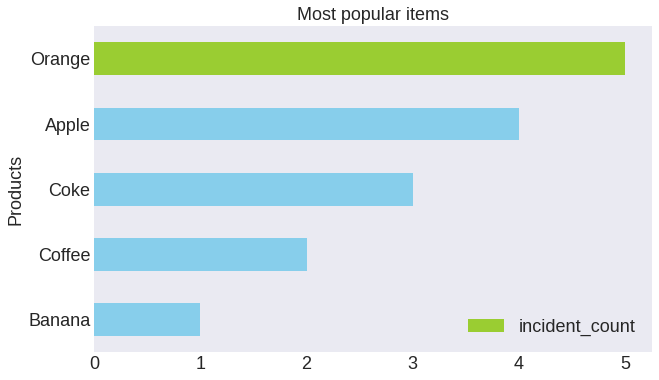

In [24]:
colors = ['yellowgreen' if (bar == max(favorites['incident_count']))
          else 'skyblue' for bar in favorites['incident_count']
         ]

plt.rcParams['figure.figsize'] = (10, 6)
mpl.style.use('seaborn-dark')

ax = favorites.plot.barh(x = 'items',
                         y = 'incident_count', 
                         color=colors
                       )

plt.title('Most popular items', 
         fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Products', 
           fontsize = 18
          )

plt.legend(loc='lower right',  
           fontsize=18
          ) #upper

plt.gca().invert_yaxis()

## Association Mining 

**Association Mining** searches for frequent items in the data-set. 

Frequent Mining shows which items appear together in a transaction or relation

### Association rules 

**Association rules** are **if-then** statements that help to show the probability of relationships between data items within large data sets in various types of databases.

In [25]:
teDf.columns
#x.columns

#6 items
# 2^6 - 1 = 2*2*2*2*2*2 - 1 = ?? 

Index(['Apple', 'Banana', 'Coffee', 'Coke', 'Orange'], dtype='object')

In [26]:
#I chose 0.33 (33%) minimum support (at least 2 transactions must have the item, out of 6 transactions)
a_rules = apriori(teDf, 
                  min_support = 0.3, 
                  use_colnames = True
                 )
a_rules

,support,itemsets
0,0.666667,(Apple)
1,0.333333,(Coffee)
2,0.500000,(Coke)
3,0.833333,(Orange)
4,0.333333,"(Apple, Coke)"
5,0.500000,"(Orange, Apple)"
6,0.333333,"(Orange, Coffee)"
7,0.500000,"(Orange, Coke)"
8,0.333333,"(Orange, Apple, Coke)"


In [27]:
df

,0,1,2,3
0,Apple,Orange,NaN,NaN
1,Apple,Banana,NaN,NaN
2,Apple,Coke,Orange,NaN
3,Orange,Coke,NaN,NaN
4,Orange,Coffee,NaN,NaN
5,Apple,Coffee,Orange,Coke


## Support 

\begin{align*}  \text{support }(x) = \cfrac{\text{# trasactions with x}}{\text{# of total transactions}}
\end{align*}

which is nothing but the probability of occurance of `x`

In [28]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/tec03/Datasets/main/images/p_of_a.png', width=400)

Support - area of the orange circle

*  The `support` is `0.50` calculated by dividing the number of transactions containing `Orange` and `Coke` (since those are antecedents and consequents) by the total number of transactions.

## Lift

In [29]:
rules = association_rules(a_rules, 
                          metric = 'lift', 
                          #min_threshold = .1 # 'LIFT' >=.6 will be shown
                         )
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple),(Coke),0.666667,0.500000,0.333333,0.500000,1.0,0.000000,1.000000
1,(Coke),(Apple),0.500000,0.666667,0.333333,0.666667,1.0,0.000000,1.000000
2,(Orange),(Apple),0.833333,0.666667,0.500000,0.600000,0.9,-0.055556,0.833333
3,(Apple),(Orange),0.666667,0.833333,0.500000,0.750000,0.9,-0.055556,0.666667
4,(Orange),(Coffee),0.833333,0.333333,0.333333,0.400000,1.2,0.055556,1.111111


## Confidence

In [30]:
Image(url='https://raw.githubusercontent.com/tec03/Datasets/main/images/p_of_ab.png', width=400)

* Out of the transactions that contains item A, how many also contains item B. 
* The bigger the overlap, the greater the confidence we have that people who are buying item A also buys item B.  

Statistically speaking, it is (estimated) conditional probably of item B given item A, i.e. P(B|A).

Confidence - ratio of orange (overlap) area with respect to blue area

* The `confidence` level is `0.40` shows that out of all the transactions that contain `Apple` 40% contain `Bananas` too.

* Confidence is an indication of how often the rule has been found to be true.
* It signifies the likelihood of item Y being purchased when item X is purchased. 
* Conf{A->O} = 75% means, 75% of the customers who purchased an Apple also bought Orange
    * There are 4 transactions with Apple. Out of 4, 3 transactions (75%) have Orange. 

## Lift 

The ratio between Confidence of A and Support B. 


\begin{align*}  
    \text{Lift (A} \rightarrow \text{B)} &= \cfrac{\text{Confidence (A } \rightarrow \text{ B)}}{\text{Support (B)}}\\
    & = \cfrac{\text{Support (A } \cap \text{B}) }{\text{Support (A)*Support (B)}}\\
    & = \cfrac{P(A \cap B)}{P{(A)}*P{(B)}}
\end{align*}

### Lift Case1 - Independent : (There is intersection - Can be large / can be small)

 If A and B are independent, then P(A $\cap$ B) = P(A)*P(B)

i.e., \begin{align*}  
    \text{Lift (A} \rightarrow \text{B)} = 1
    \end{align*}
    
    
If buying item A is independent of buying item B, then know the customer brought item A will offer no support (or confidence) to guess they will also buy item B.

### What if $P(A\cap B) = P(A) = P(B)$


\begin{align*}  
    \text{Lift (A} \rightarrow \text{B)} 
    & = \cfrac{P(A \cap B)}{P{(A)}*P{(B)}}\\
    & = \cfrac{P(A)}{P{(A)}*P{(B)}}\\
    & = \cfrac{1}{P{(B)}} = \cfrac{1}{P{(A)}}
\end{align*} 

#### If P(B) is large (say 0.99): 

\begin{align*}  
    \text{Lift (A} \rightarrow \text{B)} 
    & = \cfrac{1}{P{(B)}} = \cfrac{1}{0.99} = 1.0101
\end{align*}

*  Buying item B is very common (A as well). 
*  Even if they do both appear in a single transaction, it is more likely due to `commonality` rather than `association`, so the Lift from one to the other is close to no association (independent).

#### If P(B) is small (say 0.01): 

\begin{align*}  
    \text{Lift (A} \rightarrow \text{B)} 
    & = \cfrac{1}{P{(B)}} = \cfrac{1}{0.002} = 500
\end{align*}

*  Buying item B is very rare (A as well)
* If they do both appear in a single transaction, it is very unlikely to happen together, hence there is a strong association, so the Lift from one to the other is large.

### Lift Case2 - Mutually exclusive:  (No intersection at all / intersection at minuscule scale)

 If A and B are mutually exclusive, then P(A $\cap$ B) = 0

i.e., \begin{align*}  
    \text{Lift (A} \rightarrow \text{B)} = 0
    \end{align*}
    
Buying item A will immediately indicate the customer will not buy item B.

\begin{align*}  
    P(A \cap B) = 0.01
\end{align*} 


\begin{align*}  
    \text{Lift (A} \rightarrow \text{B)} 
    & = \cfrac{P(A \cap B)}{P{(A)}*P{(B)}}\\
    & = \cfrac{0.01}{P{(A)}*P{(B)}} = \text{small value irrespective of value of P(A) or P(B)}
\end{align*} 



* In the case P(B) and  P(A) is `large` (say 0.9), the Lift is small (i.e. 0.01/0.9 = 0.011). 
* Individually each item are `commonly brought`, but they are not often brought together.


* In the case P(B) and P(A) is `small` (say 0.01), the Lift is close to 1 (i.e. 0.01/0.01 = 1). 
* Two uncommon items are brought together, they `may be associated or may not be`. 
   * there is not enough evidence to suggest either.

### Conclusion - Lift

*  Large overlap indicates strong association 
*  Small overlap indicates small association
*  The result does depends on the probability (frequency of transactions within the total transactions) of buying individual items. 


*  Lift close to 1, it is almost indifferent as buying item A affects buying item B. 
    * no association between items.
*  Large Lift, buying item A are likely to buy/brought item B as well. 
*  Small Lift (less than 1), buying item A decrease the likelihood (discourage) buying item B.

* `(Coke) ->	(Apple, Coffee)`: The `lift 2` tells us that `(Apple, Coffee)` is 2 times more likely to be bought by the customer who also buys `(Coke)`.

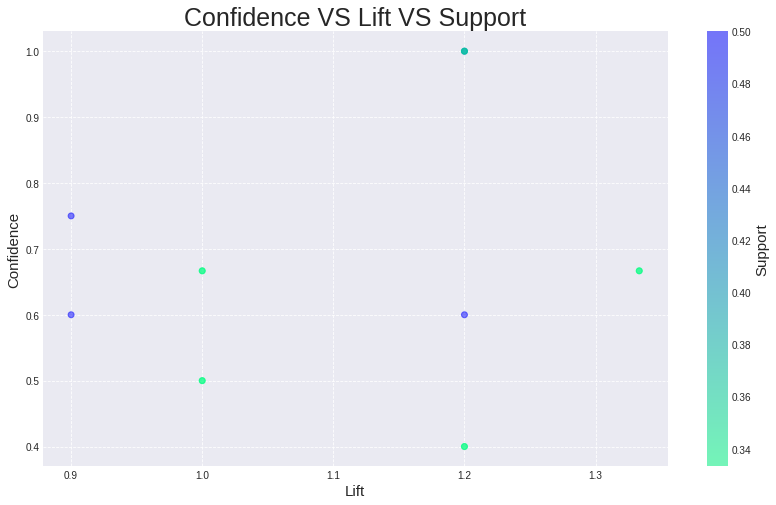

In [31]:
plt.figure(figsize = (14,8))

color = rules.support.tolist()

plt.scatter(x = rules.lift, 
            y = rules.confidence,
            marker = "o", 
            linewidth = 1, 
            alpha = 0.5, 
            c = color, 
            cmap = "winter_r"
           )

plt.grid(ls='dashed')


cbar = plt.colorbar()
cbar.set_label("Support", 
               size = 15
              )

plt.xlabel("Lift", 
           size = 15
          )
plt.ylabel("Confidence", 
           size = 15
          )

plt.title("Confidence VS Lift VS Support", 
           size = 25
         )

plt.show()

## Conclusions

* The most popular item in this data set is `Orange` followed by `Apple` and `Coke`  
* By applying the Apriori algorithm and association rules we can have a better insight on what items are more likely to be bought together

<!--NAVIGATION-->
< [previous](prev) | [Contents](toc.ipynb) | [next](next.ipynb) >